In [1]:
import numpy as np
import pandas as pd
from soundfile import read as sf_read
import librosa
import matplotlib.pyplot as plt

Let's take a look at the raw audio visualization for a file:

In [2]:
tracks = pd.read_csv('./data/processed_genres.csv')
fpath = tracks['fpath'][0]

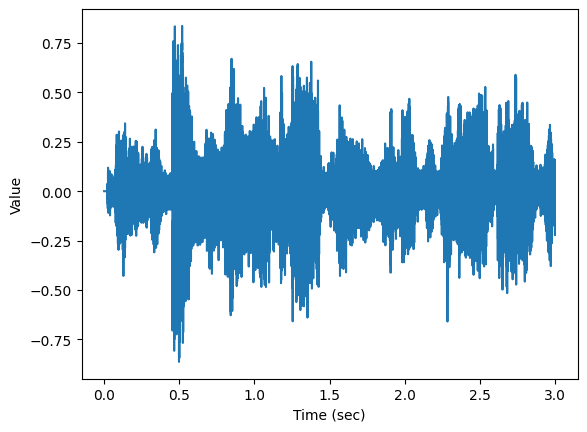

In [3]:
# 3 seconds of the audio
dim = 44100*3

fpath = './data/fma_medium' + fpath
audio, _ = sf_read(fpath)
# Convert to one channel by averaging stereo channels
audio = np.mean(audio, axis=-1)

audio = audio[:dim]

plt.figure()
plt.plot(np.linspace(0, 3, len(audio)), audio)
plt.xlabel('Time (sec)')
plt.ylabel('Value')
plt.savefig('./visualizations/og_audio_signal.png')

(128, 259)


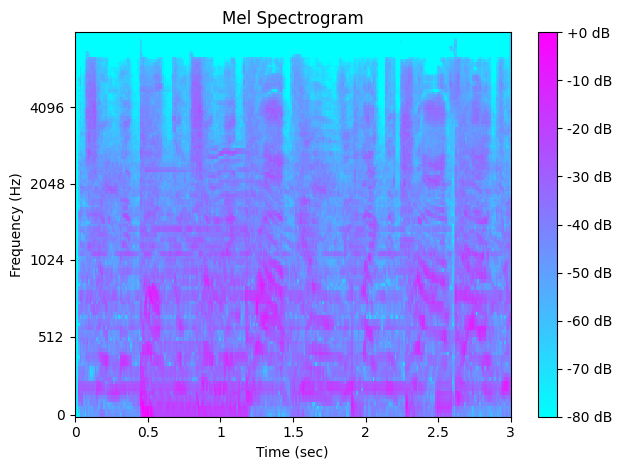

In [4]:
# Mel spectrogram parameters
n_fft=1024
hop_length=512

# Generate the mel spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=44100, n_fft=n_fft, hop_length=hop_length)
mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)

print(mel_spectrogram.shape)

# Plot it
plt.figure()
librosa.display.specshow(mel_spectrogram, y_axis='mel', sr=44100, fmax=8000, x_axis='time', cmap='cool', hop_length=hop_length)
plt.title('Mel Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Time (sec)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.savefig('./visualizations/mel_spectrogram.png')
plt.show()